In [1]:
from sklearn.neighbors import KNeighborsClassifier
x_train = [[0],[1],[2],[3]]
y_train = [0,0,0,1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
print(f'클래스의 종류 : {neigh.classes_}')
print(f'거리 계산 방법 : {neigh.effective_metric_}')
print(f'훈련 데이터 샘플 수 : {neigh.n_samples_fit_}')


클래스의 종류 : [0 1]
거리 계산 방법 : euclidean
훈련 데이터 샘플 수 : 4


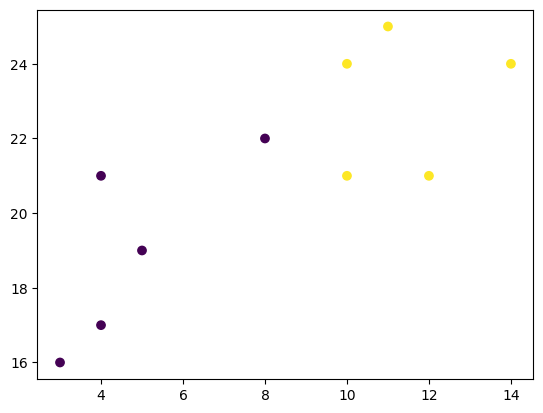

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import  KNeighborsClassifier
x = [4,5,10,4,3,11,14,8,10,12]
y = [21, 19 ,24, 17 ,16, 25, 24, 22, 21, 21]
classes = [0,0,1,0,0,1,1,0,1,1]
plt.style.use('default')
plt.scatter(x,y,c=classes)
plt.show()
data = list(zip(x,y))
print(data)

[0]


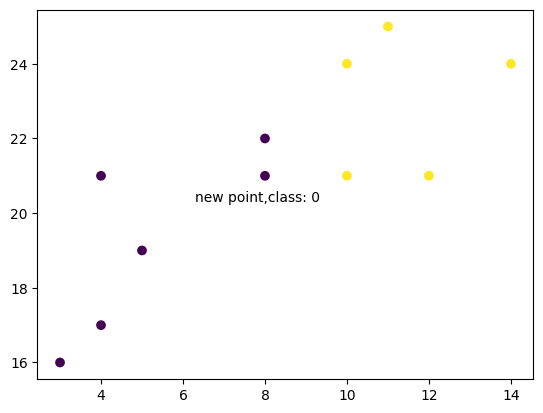

In [3]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data,classes)
new_x = 8
new_y = 21
new_point = [(new_x,new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x+[new_x],y+[new_y],c=classes+[prediction[0]])
plt.text(x=new_x-1.7,y=new_y-0.7,s=f'new point,class: {prediction[0]}')
plt.show()

[1]


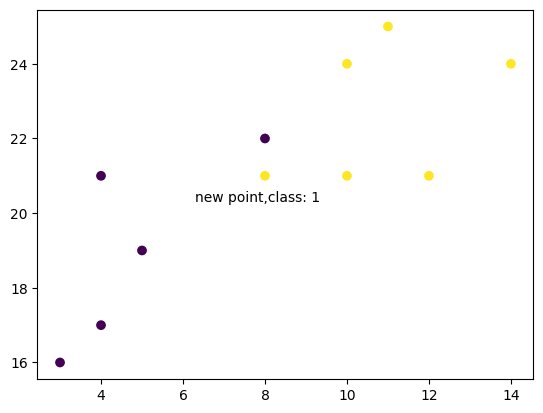

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data,classes)
new_x = 8
new_y = 21
new_point = [(new_x,new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x+[new_x],y+[new_y],c=classes+[prediction[0]])
plt.text(x=new_x-1.7,y=new_y-0.7,s=f'new point,class: {prediction[0]}')
plt.show()

In [5]:
#최적의 k값 찾는 방법
from sklearn.model_selection import cross_val_score
for i in range(1,3):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn,data,classes,cv=3,scoring='accuracy')
    print(f'{i}번째 정확도 : {scores.mean()}')



1번째 정확도 : 0.8055555555555555
2번째 정확도 : 0.9166666666666666


In [6]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'x1': np.arange(11),'x2':np.arange(11)**2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [7]:
from sklearn.preprocessing import  StandardScaler
standardScaler = StandardScaler()
df_standardScaler = standardScaler.fit_transform(df)
pd.DataFrame(df_standardScaler,columns=['A_std','B_std'])

,A_std,B_std
0,-1.581139,-1.066004
1,-1.264911,-1.035546
2,-0.948683,-0.944175
3,-0.632456,-0.791888
4,-0.316228,-0.578688
5,0.000000,-0.304572
6,0.316228,0.030457
7,0.632456,0.426401
8,0.948683,0.883260
9,1.264911,1.401033


In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'x1': np.arange(11),'x2':np.arange(11)**2})

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
df_minmaxScaled = minmaxScaler.fit_transform(df)
pd.DataFrame(df_minmaxScaled,columns=['A_minmax','B_minmax'])

,A_minmax,B_minmax
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


In [9]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [10]:
df = pd.read_csv('data/Machine_Learning/chap11_movie_genre_final.csv')
df.head()

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,8,7.6,1,0,0,0,1,1,...,0,0,0,0,0,0,0,Christopher Nolan,"AnneHathaway,ChristianBale,GaryOldman,MichaelC...","['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,6,6.1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,Andrew Stanton,"LynnCollins,SamanthaMorton,TaylorKitsch,Willem...","['based on novel', 'mars', 'medallion', 'space..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4775 non-null   int64  
 1   original_title  4775 non-null   object 
 2   target          4775 non-null   int64  
 3   vote_average    4775 non-null   float64
 4   Action          4775 non-null   int64  
 5   Adventure       4775 non-null   int64  
 6   Fantasy         4775 non-null   int64  
 7   ScienceFiction  4775 non-null   int64  
 8   Crime           4775 non-null   int64  
 9   Drama           4775 non-null   int64  
 10  Thriller        4775 non-null   int64  
 11  Animation       4775 non-null   int64  
 12  Family          4775 non-null   int64  
 13  Western         4775 non-null   int64  
 14  Comedy          4775 non-null   int64  
 15  Romance         4775 non-null   int64  
 16  Horror          4775 non-null   int64  
 17  Mystery         4775 non-null   i

C:\Users\mega\AppData\Local\Temp\ipykernel_9036\2126763904.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'],bins=20)


Text(0.5, 1.0, 'movie count')

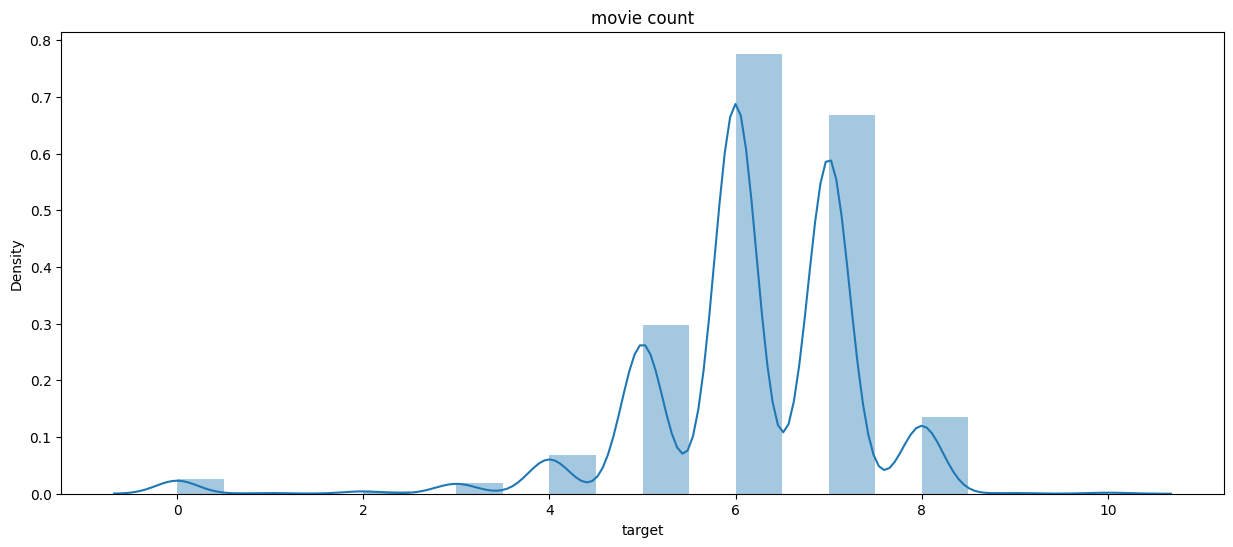

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1,figsize=(15,6))
sns.distplot(df['target'],bins=20)
plt.title('movie count')

C:\Users\mega\AppData\Local\Temp\ipykernel_9036\4215062437.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'],bins=20)


Text(0.5, 1.0, 'vote_average')

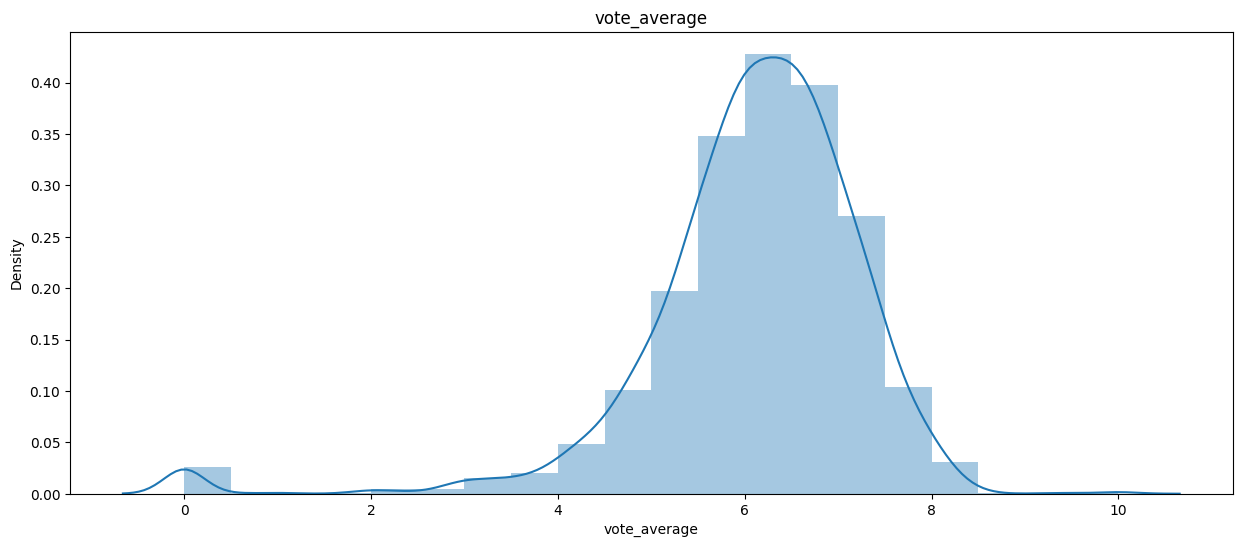

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1,figsize=(15,6))
sns.distplot(df['vote_average'],bins=20)
plt.title('vote_average')

In [14]:
print(df.columns)

Index(['id', 'original_title', 'target', 'vote_average', 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie',
       'director', 'cast', 'keywords'],
      dtype='object')


In [15]:
genre_list = [ 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']
count_list = []
for i in genre_list:
    #해당 장르가 1인걸 찾고 그 해당하는 데이터 df가져온후  len갯수 카운트
    count_list.append(len(df[df[i]==1]))
count_list
count_df = pd.DataFrame({'genre_list':genre_list,'count_list':count_list})
count_df

,genre_list,count_list
0,Action,1140
1,Adventure,786
2,Fantasy,421
3,ScienceFiction,535
4,Crime,691
5,Drama,2281
6,Thriller,1270
7,Animation,232
8,Family,512
9,Western,81


Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


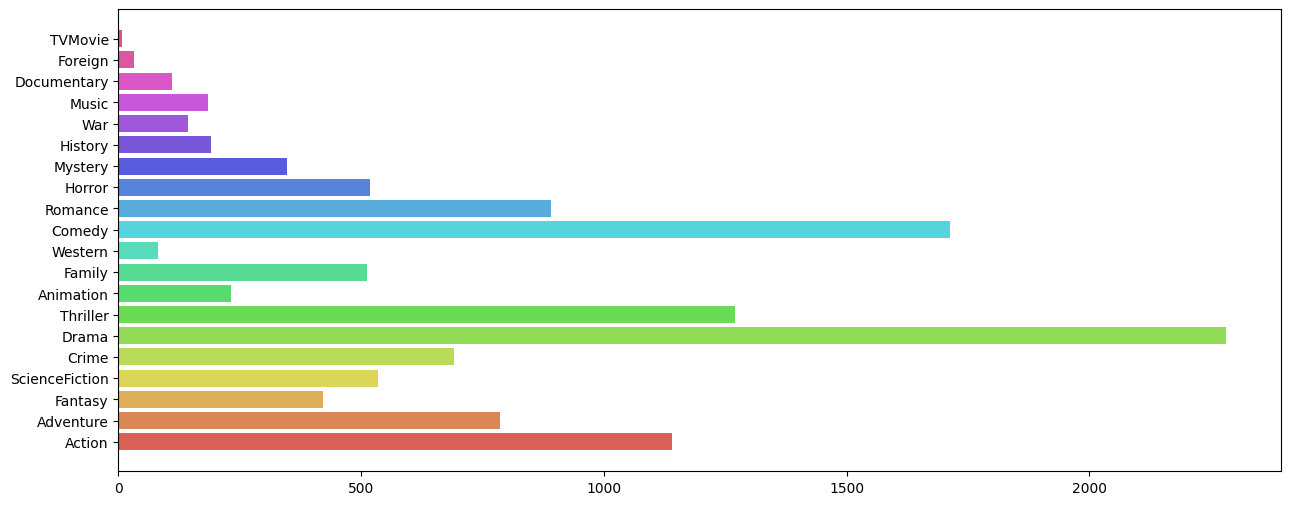

In [16]:

plt.figure(1,figsize=(15,6))
plt.barh(genre_list,count_list,color=sns.color_palette('hls',20))
for i in range(len(genre_list)):
    print(f'{genre_list[i]} : {count_list[i]}')

In [17]:
for genre_name in count_df.genre_list:
    temp = (df[genre_name]==1)&(df.vote_average>=6.5)
    target_count = count_df[count_df.genre_list==genre_name]['count_list'].values[0]
    print(f'{genre_name} 영화 {target_count}평 중 평점 6.5 이상 : {len(df[temp])}편')



Action 영화 1140평 중 평점 6.5 이상 : 355편
Adventure 영화 786평 중 평점 6.5 이상 : 304편
Fantasy 영화 421평 중 평점 6.5 이상 : 146편
ScienceFiction 영화 535평 중 평점 6.5 이상 : 192편
Crime 영화 691평 중 평점 6.5 이상 : 304편
Drama 영화 2281평 중 평점 6.5 이상 : 1208편
Thriller 영화 1270평 중 평점 6.5 이상 : 415편
Animation 영화 232평 중 평점 6.5 이상 : 118편
Family 영화 512평 중 평점 6.5 이상 : 187편
Western 영화 81평 중 평점 6.5 이상 : 45편
Comedy 영화 1714평 중 평점 6.5 이상 : 521편
Romance 영화 891평 중 평점 6.5 이상 : 377편
Horror 영화 518평 중 평점 6.5 이상 : 103편
Mystery 영화 347평 중 평점 6.5 이상 : 138편
History 영화 191평 중 평점 6.5 이상 : 130편
War 영화 143평 중 평점 6.5 이상 : 94편
Music 영화 184평 중 평점 6.5 이상 : 102편
Documentary 영화 110평 중 평점 6.5 이상 : 70편
Foreign 영화 33평 중 평점 6.5 이상 : 18편
TVMovie 영화 8평 중 평점 6.5 이상 : 2편


In [18]:

count_df = pd.DataFrame(data=count_list,index=genre_list)
count_df.loc['Drama',0]
# for genre_name in count_df.genre_list:
#     temp = (df[genre_name]==1)&(df.vote_average>=6.5)
#     target_count = count_df[count_df.genre_list==genre_name]['count_list'].values[0]
#     print(f'{genre_name} 영화 {target_count}평 중 평점 6.5 이상 : {len(df[temp])}편')
#


2281

In [19]:
x = df[[ 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']]
y=df[['target']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)


(3820, 20)
(955, 20)


In [20]:
df.head()

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,8,7.6,1,0,0,0,1,1,...,0,0,0,0,0,0,0,Christopher Nolan,"AnneHathaway,ChristianBale,GaryOldman,MichaelC...","['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,6,6.1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,Andrew Stanton,"LynnCollins,SamanthaMorton,TaylorKitsch,Willem...","['based on novel', 'mars', 'medallion', 'space..."


In [22]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    print(f'{i}번째 정확도 : {scores.mean()}')


D:\machine_learning\venv\Lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_

1번째 정확도 : 0.34554973821989526


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

2번째 정확도 : 0.3206806282722513


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3번째 정확도 : 0.32748691099476435


D:\machine_learning\venv\Lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4번째 정확도 : 0.36387434554973824


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
print(neigh.classes_)
print(f'거리계산방법 : {neigh.effective_metric_}')
print(f'샘플수 : {neigh.n_samples_fit_}')

[ 0  1  2  3  4  5  6  7  8  9 10]
거리계산방법 : euclidean
샘플수 : 3820


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
print(neigh.score(x_test,y_test))
new_x = [1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(new_x))
prediction = neigh.predict([new_x])
print(prediction)

0.38534031413612563
20
[5]


D:\machine_learning\venv\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [30]:
import pandas as pd
df = pd.read_csv('data/Machine_Learning/chap11_basketball_final.csv')
df.head()

,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,4.1,1.9,0.4,0.4,1.3,0
1,2.4,3.7,1.1,0.5,1.6,0
2,2.2,1.0,0.5,0.3,1.0,0
3,1.9,0.8,0.6,0.1,1.0,1
4,2.5,0.3,0.3,0.4,0.8,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rebounds   1340 non-null   float64
 1   Assists    1340 non-null   float64
 2   Steals     1340 non-null   float64
 3   Blocks     1340 non-null   float64
 4   Turnovers  1340 non-null   float64
 5   Target     1340 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


Text(0.5, 1.0, 'player')

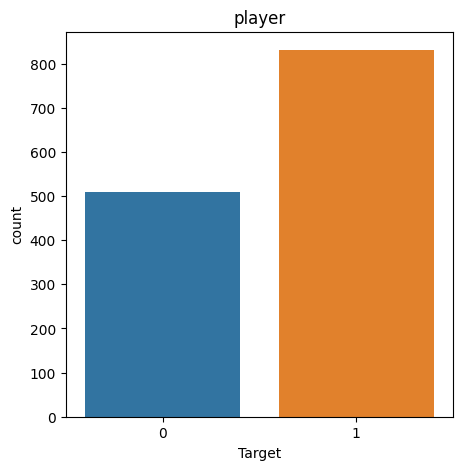

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1,figsize=(5,5))
sns.countplot(x='Target',data=df)
plt.title('player')

In [58]:
df_0=df['Target']
df_0
df.loc[[df.Target=='0']]
# df_1 = df.Target=='1'
# df_target = pd.DataFrame(df_0,df_1,columns=['0','1'])
# df_target

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

In [62]:
print(f"리바운드\n{df['Rebounds'].groupby(df['Target']).mean()}")
print(f"어시스트\n{df['Assists'].groupby(df['Target']).mean()}")
print(f"스틸\n{df['Steals'].groupby(df['Target']).mean()}")
print(f"블록\n{df['Blocks'].groupby(df['Target']).mean()}")
print(f"턴오버\n{df['Turnovers'].groupby(df['Target']).mean()}")

리바운드
Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64
어시스트
Target
0    1.221022
1    1.752347
Name: Assists, dtype: float64
스틸
Target
0    0.498232
1    0.692178
Name: Steals, dtype: float64
블록
Target
0    0.253438
1    0.439110
Name: Blocks, dtype: float64
턴오버
Target
0    0.942240
1    1.347533
Name: Turnovers, dtype: float64


In [63]:
x = df[['Rebounds','Assists','Steals','Blocks','Turnovers']]
y = df[['Target']]
from sklearn.model_selection import  train_test_split
x_train ,x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)


(1072, 5)
(268, 5)


In [64]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    print(f'{i}번째 정확도 : {scores.mean()}')

D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

1번째 정확도 : 0.5843283582089553
2번째 정확도 : 0.5283582089552239
3번째 정확도 : 0.5970149253731343
4번째 정확도 : 0.5940298507462687


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [65]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train,y_train)
print(neigh.classes_)
print(f'거리계산방법 : {neigh.effective_metric_}')
print(f'샘플수 : {neigh.n_samples_fit_}')

[0 1]
거리계산방법 : euclidean
샘플수 : 1072


D:\machine_learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [66]:
print(neigh.score(x_test,y_test))
new_x = [3,2,2,2,4]
prediction = neigh.predict([new_x])
print(prediction)

0.6455223880597015
[1]


D:\machine_learning\venv\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
#k-nn알고리즘 작성
import  matplotlib.pyplot as plt
#닥스훈트의 길이와 높이 데이터
dach_length = [55,57,64,63,58,49,54,61]
dach_height = [30,31,36,30,33,25,37,34]
#진돗개의 길이와 높이 데이터
jin_length = [56,47,56,46,49,53,52,48]
jin_height = [52,52,50,53,50,53,49,54]


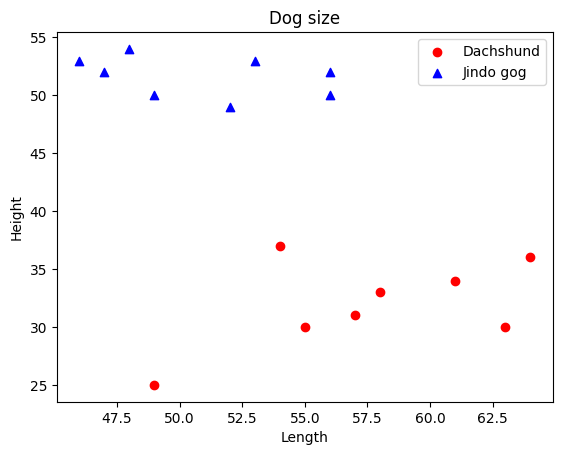

In [70]:
plt.scatter(dach_length,dach_height,c='r',label='Dachshund')
plt.scatter(jin_length,jin_height,c='b',marker='^',label='Jindo gog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper right')


In [71]:
newdata_length = [59]
newdata_height = [35]


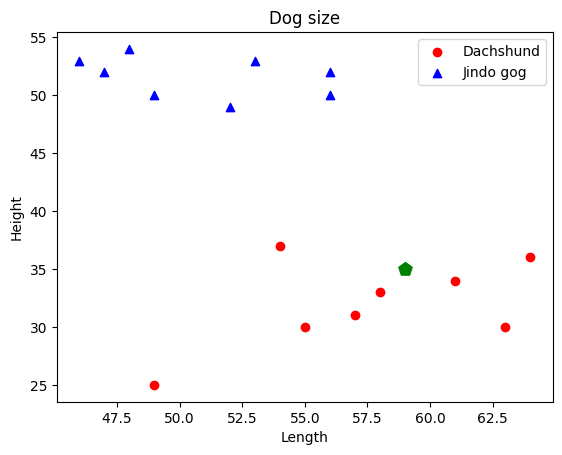

In [73]:
plt.scatter(dach_length,dach_height,c='r',label='Dachshund')
plt.scatter(jin_length,jin_height,c='b',marker='^',label='Jindo gog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper right')
plt.scatter(newdata_length,newdata_height,s=100,marker='p'
            ,c='g',label='new Data')

In [75]:
d_data = np.column_stack((dach_length,dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링
d_label

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
j_data = np.column_stack((jin_length,jin_height))
j_label = np.ones(len(j_data))


array([1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
newdata = [[59,35]]

dog_classes = {0:'닥스훈트',1:'진돗개'}
k=3
dogs = np.concatenate((d_data,j_data))
labels = np.concatenate((d_label,j_label))
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(dogs,labels)
y_pred = knn.predict(newdata)
print(y_pred)
print('데이터',newdata,',판정결과',dog_classes[y_pred[0]])

[0.]
데이터 [[59, 35]] ,판정결과 닥스훈트
